# Keras : Neural Networks using MNIST dataset #

## Introduction

A popular demonstration of the capability of deep learning techniques is object recognition in image data.
In this notebook we are going to classify handwritten digits from the MNIST dataset (which is kind of the "Hello World" example for neural networks) using [KERAS](https://keras.io). It is based on a [tutorial](http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/) created by Dr. Jason Brownlee.

In [25]:
# setup
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

np.random.seed(7)
%matplotlib inline

### Activation Function
Among the most popular activation functions for neural networks are `linear`, `sigmoid`, `tangens hyperbolicus (tanh)` and `rectified linear (relu)` (see the plots below). We will use `relu` for the activation in the hidden layer. 

$$
\begin{align}
linear(x) &= m \cdot x + t \\
sigmoid(x) &= \frac{1}{1+e^{-x}} \\
tanh(x) &= \frac{e^x - e^{-x}}{e^x + e^{-x}}\\
relu(x) &= max(x,0)
\end{align}
$$

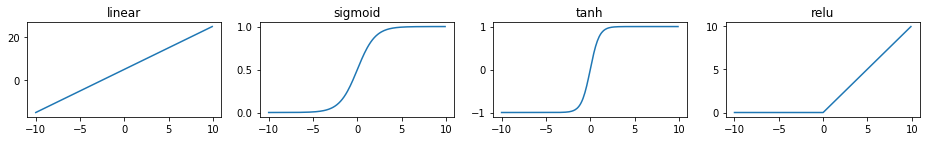

In [26]:
from scipy.special import expit

x = np.arange(-10, 10,0.1)
plt.figure(figsize=(16, 8))
plt.subplot(4,4,1)
plt.title('linear')
plt.plot(x, 2*x+5)
plt.subplot(4,4,2)
plt.title('sigmoid')
plt.plot(x, expit(x))
plt.subplot(4,4,3)
plt.title('tanh')
plt.plot(x,np.tanh(x))
plt.subplot(4,4,4)
plt.title('relu')
plt.plot(x,np.maximum(x,0))

plt.show()

### Output layer
In the output layer, we will use the softmax function, which is a generalization of the logistic function.  

$$
softmax(x)_j = \frac{e^{x_j}}{\sum_{k=1}^{K}e^{x_k}}
$$

It can be thougt of as the multiclass extension to the sigmoid and represents a probability distribution over K different classes. For a binary classifier, they resemble the same.
<img src="../pics/softmax_sigmoid.png"/>

### Loss Function
With a softmax in the output, the cross entropy is the usual loss function used and we will also do so.

$$
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
$$

## Dataset and Pre-Processing

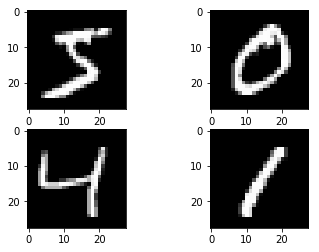

In [27]:
from keras.datasets import mnist 
# if you run into errors like "ModuleNotFoundError: No module named 'tensorflow'"
# and you have installed keras via conda install, manually set the backend to 'theano'
# in .keras/keras.json in your home directory (the conda installation seems to install theano by default)

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot the first 4 images in the training set as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

The pixel values are our input to the neural network, therefore we flatten each sample to an array. Each entry will then be the input to a neuron in our first layer. To make this work, each row in the training data needs to be in the same shape as our input layer.  
Further, we fix the precision of the pixel values to 32bit and normalize the inputs to the range [0,1].

In [28]:
# flatten
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix. In our case, it is mandatory, since each neuron in the output layer will correspond to a class and predict its probability. Therefore, the target vectors (or rows in the matrix) need to be in the same shape as the output layer.

In [29]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Define the model
We are now ready to create our neural network model. We will define our model in a function. This is handy if you want to extend the example later and try and get a better score.

We define a model with a single hidden layer, which alreay achieves pretty decent results. As activation functions, we use `relu` in the hidden layer and `softmax` in the output layer. Our loss function is cross entropy.

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
	model.add(Dense(num_classes, init='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

## Training and evaluation
Finally, we fit and evaluate the model

In [31]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

//anaconda/envs/datsci/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
//anaconda/envs/datsci/lib/python3.6/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
2s - loss: 1.2283 - acc: 0.7147 - val_loss: 0.7064 - val_acc: 0.8496
Epoch 2/10
2s - loss: 0.6071 - acc: 0.8573 - val_loss: 0.4964 - val_acc: 0.8811
Epoch 3/10
2s - loss: 0.4770 - acc: 0.8786 - val_loss: 0.4186 - val_acc: 0.8941
Epoch 4/10
2s - loss: 0.4178 - acc: 0.8906 - val_loss: 0.3774 - val_acc: 0.9023
Epoch 5/10
2s - loss: 0.3825 - acc: 0.8980 - val_loss: 0.3505 - val_acc: 0.9082
Epoch 6/10
2s - loss: 0.3581 - acc: 0.9032 - val_loss: 0.3318 - val_acc: 0.9108
Epoch 7/10
2s - loss: 0.3400 - acc: 0.9074 - val_loss: 0.3160 - val_acc: 0.9147
Epoch 8/10
2s - loss: 0.3252 - acc: 0.9110 - val_loss: 0.3039 - val_acc: 0.9176
Epoch 9/10
2s - loss: 0.3133 - acc: 0.9139 - val_loss: 0.2941 - val_acc: 0.9199
Epoch 10/10
2s - loss: 0.3029 - acc: 0.9161 - val_loss: 0.2854 - val_acc: 0.9224
Baseline Error: 7.76%


We have used stochastic gradient descent (SGD) with the default parameters. However, there are advanced optimizers, such as Adagrad, RMSprop or Adam. Also, the performance of SGD can be improved by adding momentum. KERAS readily provides a bunch of [different optimizers](https://keras.io/optimizers/). You may for example exchange the SGD by Adam in our example to increase the performance.

Although our classification results are already quite good, they can be further improved by more complex network architectures. For an example that utilizes convolution and pooling layers, take a look at the [source tutorial](http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/).

The **[Neural Network Zoo](http://www.asimovinstitute.org/neural-network-zoo/)** provides a nice overview about the main network architectures. It contains short explanations for every architecture and a link to the original paper.